# Tarea Semanal 1

![PASS BAND](images/BPF.png)

#### 1. Analizar la impedancia de entrada desde el nodo Vx. Hallar los valores de R4,R5,Y1,Y2 e Y3 de tal manera que responda como un Inductor de valor unitario. 

![UNO](images/TS1_1.PNG)

#### 2. Obtener la función transferencia V2V1. Desnormalice convenientemente en frecuencia e impedancia para garantizar una f0 = 10kHz  y Q = 20 utilizando Capacitores entre 1 nF y 100 nF. Para los resistores no hay restricciones. 

![DOS](images/TS1_2.png)
![TRES](images/TS1_3.png)

Con la transferencia ya planteada, buscamos elegir convenientemente Y1 Y2 Y3 de tal forma que nos quede la transferencia de un pasa banda de segundo roden.
- Para ello se elige Y2 como un capacitor, mientras que Y1 e Y3 son resistores.

![CUATRO](images/TS1_4.png)

Esta expresión representa la función de transferencia **desnormalizada** del pasa banda en cuestión.  
Antes de continuar con el diseño, se procederá a **normalizar** el pasa banda en frecuencia e impedancia:

![CUATRO](images/TS1_5.png)

El criterio para seleccionar la norma de impedancia fue buscar una resistencia que no estuviese significativamente involucrada en los parámetros del filtro, es decir: $Q$, $W_0$ y $K$.

Las resistencias que cumplían con esta condición eran $R_1$ y $R_3$. Se optó por normalizar respecto a $R_3$, simplemente por preferencia personal.

#### Bonus 1: Cálculo de la ganancia en $W_0$

Para obtener una ganancia de $20\ \text{dB}$ en la frecuencia $W_0$, se utiliza la relación:

$$
20\ \text{dB} = 20 \log_{10}(x) \quad \Leftrightarrow \quad x = 10
$$

En este caso, se busca que:

$$
10 = 1 + \frac{R_4}{R_5}
$$

Despejando:

$$
\frac{R_4}{R_5} = 9 \quad \Rightarrow \quad R_4 = 9 \cdot R_5
$$

Se elige:

$$
R_4 = 1800\ \Omega \quad \text{y} \quad R_5 = 200\ \Omega
$$

#### Bonus 2: Consideraciones sobre el reemplazo con GIC

Si se detectan inconvenientes, el inductor del **Gráfico 1** se conecta a tierra, y el circuito GIC genera un equivalente de un inductor **conectado a tierra**.

Nótese que en el **Gráfico 2**, el inductor **no** se encuentra a tierra, sino conectado a un capacitor.

En conclusión, el alumno desconoce si existe algún truco circuital o modificación del GIC que permita resolver esta diferencia topológica.  
Por lo tanto, **no se puede hacer el reemplazo directamente**.


#### 3.  Simule la transferencia desnormalizada en Python. Se sugiere programar la transferencia normalizada y definir las normas de frecuencia e impedancia para desnormalizar. Verificar los requerimientos pedidos en 2)


### Asignación de valores antes del Punto 3

Antes de continuar con el Punto 3, se asignan los valores correspondientes al Punto 2, que fue pausado para incorporar las condiciones planteadas en el primer ejercicio bonus.

Se definen los siguientes componentes:

- $C = C_2 = 10\ \text{nF}$
- $R_4 = 1800\ \Omega$  
- $R_5 = 200\ \Omega$
- Se supone $R_1 = 1000\ \Omega$

Con estos valores, se puede despejar $R_3$ utilizando la expresión:

$$
R_3 = \frac{R_4}{C \cdot C_2 \cdot R_1 \cdot R_5 \cdot W_0^2}
$$

$$
R_3 \approx 22797 \Omega
$$

También se realiza el cálculo de  $R$  valiéndose de la ecuación

$$
\frac{W_0}{Q} = \frac{1}{C \cdot R}
$$

lo que da como resultado:

$$
R \approx 31831\ \Omega
$$



In [2]:
from scipy.signal import TransferFunction
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np

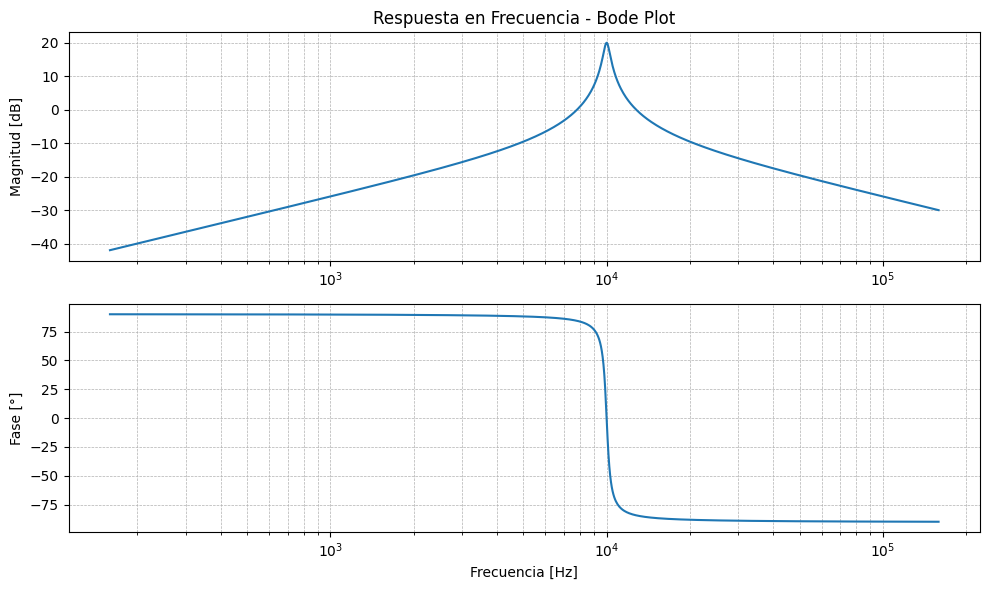

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, bode

# Parámetros del circuito
C = 10e-9
C2 = 10e-9
R = 31831
R1 = 1e3
R3 = 22797
R5 = 0.2e3
R4 = 1.8e3

# Función de transferencia
num = [(1 / (C * R)) * (1 + R4 / R5), 0]
den = [1, 1 / (C * R), R4 / (C * C2 * R5 * R3 * R1)]

# Rango de frecuencias
freqs = np.logspace(3, 6, 1000)  # de 1 Hz a 1 MHz

# Crear sistema y obtener respuesta en frecuencia
H = TransferFunction(num, den)
w, mag, phase = bode(H, freqs)  # convertir Hz a rad/s

# Graficar
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.semilogx(w/(2*np.pi), mag)
plt.title("Respuesta en Frecuencia - Bode Plot")
plt.ylabel("Magnitud [dB]")
plt.grid(which='both', linestyle='--', linewidth=0.5)

plt.subplot(2, 1, 2)
plt.semilogx(w/(2*np.pi), phase)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Fase [°]")
plt.grid(which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


